In [30]:
import numpy
import scipy.special
import matplotlib.pyplot
import glob
import imageio
%matplotlib inline
# определение класса нейронной сети
class neuralNetwork:
    
    # инициализировать нейронную сеть
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        
        self.inodes = inputnodes #кол-во узлов во входном слое
        self.hnodes = hiddennodes #кол-во узлов в крытом слое
        self.onodes = outputnodes #кол-во узлов в выходном слое
        
        # 1) центр нормального распределения установлен здесь в 0,0
        # 2) Стандартное отклонение вычисляется по количеству узлов в следующем слое с помощью функции pow(self .hnodes, -0.5),
        #    которая просто возводит количество узлов в степень -0,5.
        # 3) Конфигурация массива
        # матрица весовых коэффициентов между входным и скрытым слоями
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes,self.inodes))
        # матрица весовых коэффициентов между скрытым и выходным слоями
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes,self.hnodes))
        
        
        self.lr = learningrate # коэффициент обучения
        
        # использование сигмоиды в качестве функции активации
        # expit() - это сигмода y=1/(1+e^-x)
        # лямюда-выражение(анонимная функция)
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
       
        # преобразовать список входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T #транспонированая
        # тренировочные примеры
        targets = numpy.array(targets_list,ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        # рассчитать входящие сигналы для выходного слоя 
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя 
        final_outputs = self.activation_function(final_inputs)
        
        #ошибка = целевое значение - фактическое значение
        output_errors = targets - final_outputs
        
        #обратное распространение ошибки для узлов скрытого слоя
        #ошибки(скрытый)= веса(скрытый_выходной)^Т * ошибки(выходной)
        # распределенные пропорционально весовым коэффициентам связей и рекомбинированные на скрытых узлах
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # обновить весовые коэффициенты связей между скрытым и выходным слоями
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0 - final_outputs)),numpy.transpose(hidden_outputs))
        # обновить весовые коэффициенты связей между входным и скрытым слоями
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)),numpy.transpose(inputs))
        pass
    
    # опрос нейронной сети
    def query(self,inputs_list): #входные данные 
      
        # преобразовать список входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        # X(h) = W(ih) * I
        hidden_inputs = numpy.dot(self.wih,inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        # O(h) = sigmoida(X(h))
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        # X(o) = X(ho) * O(h)
        final_inputs = numpy.dot(self.who,hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        # O(o) = sigmoida(X(o)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs #выходные данные 

In [31]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# коэффициент обучения равен 0,3
learningrate = 0.1
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learningrate)

In [32]:
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [42]:
# тренировка нейронной сети

# переменная epochs указывает, сколько раз тренировочный
# набор данных используется для тренировки сети
epochs = 6

for e in range(epochs):
    # перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        # получить список значений из записи, используя символы запятой (', 1) в качестве разделителей
        all_values = record.split(',')
        # масштабировать и сместить входные
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0,01, за исключением желаемого маркерного значения, равного 0,99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] - целевое маркерное значение для данной записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [34]:
# Сет из собственных изображений
our_own_dataset = []

In [35]:
for image_file_name in glob.glob('myImages/2828_my_own_?.png'):
    print ("Загрузка - ", image_file_name)
    # использовать имя файла для устанвки коректного значения
    label = int(image_file_name[-5:-4])
    # загрузить данные изображения из png-файлов в массив
    img_array = imageio.imread(image_file_name, as_gray=True)
    # перевести размер изображения 28х28 в список из 784 значений,инвертировать значения 
    img_data  = 255.0 - img_array.reshape(784)
    
    
    
    # затем масштабируем данные в диапазоне от 0,01 до 1,0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    # добавить метку и данные изображения для тестирования набора данных
    record = numpy.append(label,img_data)
    #print(record)
    our_own_dataset.append(record)
    pass

Загрузка -  myImages\2828_my_own_2.png
0.01
1.0
Загрузка -  myImages\2828_my_own_3.png
0.01
1.0
Загрузка -  myImages\2828_my_own_4.png
0.01
0.93011767
Загрузка -  myImages\2828_my_own_5.png
0.01
0.86800003
Загрузка -  myImages\2828_my_own_6.png
0.01
1.0
Загрузка -  myImages\2828_my_own_7.png
0.10612171
0.20680353


[[0.0124659 ]
 [0.02422655]
 [0.0165931 ]
 [0.01455999]
 [0.10459404]
 [0.06925714]
 [0.051226  ]
 [0.02872768]
 [0.02742832]
 [0.00591229]]
network says  4
no match!


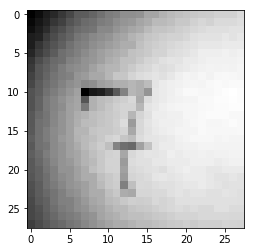

In [51]:
#Просетируем нейронную сеть нашими собственными изображениями

#запись для тестирования
item = 5

# отобразить изображение
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# Правильным ответом является первое значение
correct_label = our_own_dataset[item][0]
# data is remaining values
#
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass